# Machine Learning Challenge
Prepare train and validation data

In [1]:
import numpy as np
import argparse
import sys
import os

from data_preparation import *
from classifiers import *
from utiles import *
from main import *

In [2]:
# Read csv files
training_data_example = os.path.normpath("./training_data_example.csv")
validation_data_example = os.path.normpath("./validation_data_example.csv")
employee = os.path.normpath("./employee.csv")

In [3]:
# Prepare training data
train = PrepareDataset(training_data_example, employee)
x_train = train.create_features()
y_train_one_hot = train.create_targets()

In [4]:
# Prepare validation data
validation = PrepareDataset(validation_data_example, employee, phase="Validation")
x_validation = validation.create_features()
y_validation_one_hot = validation.create_targets()

In [5]:
# align train and validation data-frames to fill the missing features and labels
x_train, x_validation = x_train.align(x_validation, axis=1, fill_value=0)
y_train_one_hot, y_validation_one_hot = y_train_one_hot.align(y_validation_one_hot, axis=1, fill_value=0)

In [6]:
# Get the array of features and labels from data frames
x_train, y_train_one_hot = x_train.values, y_train_one_hot.values
x_validation, y_validation_one_hot = x_validation.values, y_validation_one_hot.values

In [7]:
# Decode labels
y_train = [np.where(r == 1)[0][0] for r in y_train_one_hot]
y_validation = [np.where(r == 1)[0][0] for r in y_validation_one_hot]

## Question 1:
Train a learning model that assigns each expense transaction to one of the set of predefined categories and evaluate it against the validation data provided.  The set of categories are those found in the "category" column in the training data. Report on accuracy and at least one other performance metric.

In [8]:
# call function from main.py
model_part_1(x_train, y_train, x_validation, y_validation)

Classification results of KNN: 
>> Training Accuracy = 1.00 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00        10
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        24
 
>> Validation Accuracy = 0.67 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       0.00      0.00      0.00         0
          2       0.86      0.86      0.86         7
          3       0.00      0.00      0.00         2
          4       1.00      0.50      0.67         2

avg / total       0.75      0.67      0.69        12
 
-------------------------------------------------------

Classification results of Random Forest: 
>> Training Accuracy = 0.92 
             precision    reca

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Question 2: 
Mixing of personal and business expenses is a common problem for small business.  Create an algorithm that can separate any potential personal expenses in the training data.  Labels of personal and business expenses were deliberately not given as this is often the case in our system.  There is no right answer so it is important you provide any assumptions you have made.

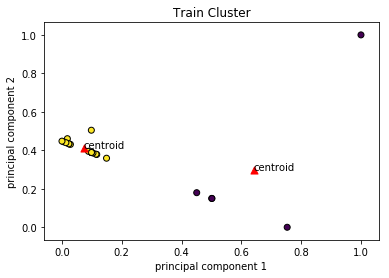

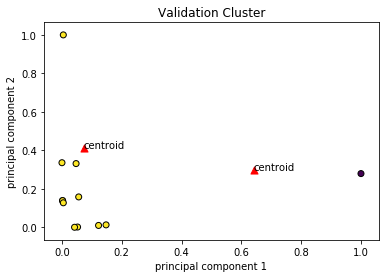

In [9]:
# call function from main.py
model_part_2(x_train, x_validation)